# Определение перспективного тарифа для телеком-компании «Мегалайн»

В предстоящем исследовании я выступлю в роли аналитика федерального оператора сотовой связи, который предлагает своим клиентам два тарифных плана: «Смарт» и «Ультра». В ходе исследования предстоит понять, какой тариф приносит больше денег. На основе этих данных компания «Мегалайн» планирует скорректировать рекламный бюджет.

In [1]:
# Импортируем библиотеки и модули, которые потребуются в проекте

import pandas as pd
from scipy import stats as st
from matplotlib import pyplot as plt
from math import factorial as f
from math import ceil
from datetime import datetime
import numpy as np
from random import randint
import warnings 
warnings.simplefilter("ignore")

# Шаг 1. Открываем файлы с данными и изучаем общую информацию

In [2]:
try:
    calls = pd.read_csv('/datasets/calls.csv')
    internet = pd.read_csv('/datasets/internet.csv')
    messages = pd.read_csv('/datasets/messages.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
    users = pd.read_csv('/datasets/users.csv')
# Если проект смотрим локально
except:
    calls = pd.read_csv('calls.csv')
    internet = pd.read_csv('internet.csv')
    messages = pd.read_csv('messages.csv')
    tariffs = pd.read_csv('tariffs.csv')
    users = pd.read_csv('users.csv')

Изучим первые 5 строк каждой таблицы, а также получим информацию о них.

In [3]:
display(calls.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


В таблице calls следует привести тип поля id к числовому, для этого потребуется избавиться от символа нижнего подчёркивания в значениях. Столбец call_date будем приводить к типу datetime.

In [5]:
display(internet.head())

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [6]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


В таблице internet прежде всего следует избавиться от столбца «Unnamed: 0» — он не несёт никакой смысловой нагрузки и его нет в техническом описании. Возможно, он оказался в наборе данных по ошибке. Данные столбца id можно привести к числовому типу после удаления символа нижнего подчёркивания. Столбец session_date следует привести к типу datetime.

In [7]:
display(messages.head())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [8]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В таблице messages данные столбца id приведём к числовому типу, удалив символ нижнего подчёркивания из них. Данные столбца message_date приведём к типу datetime.

In [9]:
display(tariffs.head())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [10]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [11]:
display(users.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В таблице users приведём данные из столбцов 'reg_date' и 'churn_date' к типу datetime.

# Шаг 2. Подготовка данных

На предыдущем шаге мы выявили необходимость в приведении столбцов id таблиц calls, internet, messages к числовому типу с удалением символа нижнего подчёркивания из данных. Также удалим столбец Unnamed: 0 в таблице internet и приведём данные столбцов с датами к типу datetime.

In [13]:
# Удаляем символы нижнего подчёркивания из значений столбцов id в таблицах и приводим данные этих столбцов в типу int:

tables_to_replace = [calls, internet, messages]

for i in tables_to_replace:
    i['id'] = i['id'].str.replace('_','')
    i['id'] = i['id'].astype('int')
    

In [14]:
# Удаляем столбец 'Unnamed: 0', который оказался в таблице internet по ошибке

internet = internet.drop('Unnamed: 0', axis=1)


In [15]:
# Приводим данные столбцов с датами к типу datetime

calls['call_date'] = pd.to_datetime(calls['call_date'])
internet['session_date'] = pd.to_datetime(internet['session_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

In [16]:
# Проверим таблицы на наличие грубых дубликатов

check_list = [calls, internet, messages, tariffs, users]

dup_sum = False # Флаг наличия грубых дубликатов. При обнаружении хотя бы в одной таблице будет переведён в True

for i in check_list:
    dup_num = i.duplicated().sum()
    if dup_num > 0:
        dup_sum = True
        print(f'В таблице {i} есть грубые дубликаты')
        
if dup_sum == False:
    print('Грубых дубликатов в таблицах не выявлено')
else:
    print('Необходимо удалить грубые дубликаты в данных')
    

Грубых дубликатов в таблицах не выявлено


Пропусков в данных, кроме пропусков в столбце 'churn_date', которые объяснены в техническом описании, не обнаружено. Когда мы вызывали методы info(), можно было обратить внимание на то, что количество записей в таблице совпадает с количеством записей в каждом из столбцов. 

Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам. Для этого сперва добавим в таблицу calls два новых столбца: 'call_month'с месяцем звонка и 'minutes' с количеством потраченных минут, а далее создадим сводную таблицу user_calls, в которой столбцами станут месяца, а строками — записи о пользователях. В «ячейках» окажутся данные о суммарно израсходованных минутах.

In [17]:
# Создадим в таблице users столбец с информацией о месяце регистрации пользователей

users['reg_month'] = users['reg_date'].dt.month

In [18]:
calls['call_month'] = calls['call_date'].dt.month

In [19]:
def get_minutes(row):
    duration = float(row['duration'])
    return int(ceil(duration))

calls['minutes'] = calls.apply(get_minutes, axis=1)

In [20]:
user_calls = calls.pivot_table(index='user_id', columns='call_month', values='minutes', aggfunc='sum')


In [21]:
# Здесь будет функция, которая приведёт к удобочитаемому виду эту и следующие сводные таблицы
def beautify_table(table):
    table['user_id'] = table.index
    table = table.reset_index(drop=True)
    table = table[['user_id'] + list(range(1, 13))]

    table = table.fillna(0)

    for i in range(1, 13):
        table[i] = table[i].astype('int')
    return table
    


In [22]:
user_calls = beautify_table(user_calls)

display(user_calls)

call_month,user_id,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,0,0,0,0,159,172,340,408,466,350,338,333
1,1001,0,0,0,0,0,0,0,0,0,0,430,414
2,1002,0,0,0,0,0,117,214,289,206,212,243,236
3,1003,0,0,0,0,0,0,0,380,961,855,824,802
4,1004,0,0,0,0,35,171,135,137,117,145,117,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,1495,0,0,0,0,0,0,0,92,813,1030,954,1031
488,1496,48,594,557,521,484,555,582,527,486,450,662,518
489,1497,0,0,0,0,0,0,0,0,0,490,371,545
490,1498,0,0,0,0,0,0,175,400,471,247,0,0


Теперь посчитаем для каждого пользователя количество отправленных сообщений по месяцам.

In [23]:
messages['message_month'] = messages['message_date'].dt.month

In [24]:
user_messages = messages.pivot_table(index='user_id', columns='message_month', values='id', aggfunc='count')

# Приводим таблицу user_messages к удобочитаемому виду с помощью функции beatify_table()
user_messages = beautify_table(user_messages)

In [25]:
display(user_messages)

message_month,user_id,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,0,0,0,0,22,60,75,81,57,73,58,70
1,1002,0,0,0,0,0,4,11,13,4,10,16,12
2,1003,0,0,0,0,0,0,0,37,91,83,94,75
3,1004,0,0,0,0,95,134,181,151,146,165,158,162
4,1005,7,38,56,41,42,47,56,64,52,44,51,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,1495,0,0,0,0,0,0,0,13,82,82,79,84
422,1496,9,45,46,49,40,35,42,41,29,35,46,51
423,1497,0,0,0,0,0,0,0,0,0,20,14,17
424,1498,0,0,0,0,0,0,20,62,44,42,0,0


Перейдём к подсчёту объёма израсходованного трафика по месяцам. Будем помнить о том, что в рамках одного месяца израсходованный трафик до 1024 мегабайт считается за 1 гб, трафик от 1025 мегабайт и до 2048 — за 2 гб и так далее.

In [26]:
# Создадим столбец с месяцем в таблице internet
internet['session_month'] = internet['session_date'].dt.month

In [27]:
user_traffic = internet.pivot_table(index='user_id', columns='session_month', values='mb_used', aggfunc='sum')

user_traffic = user_traffic.fillna(0) # избавляемся от нанов
user_traffic = user_traffic / 1024 # переводим в гигабайты 

In [28]:
# Создадим функцию для увеличения значения израсходованного трафика в большую сторону до ближайшего целого

def ceiling_table(month):
    if month == int(month):
        return month
    else:
        return ceil(month)
        

In [29]:
# Запустим эту функцию в цикле, чтобы применить её к каждому столбцу 
for i in range(1, 13):
    user_traffic[i] = user_traffic[i].apply(ceiling_table)

# В цикле приведём значения каждого столбца к целому виду
for i in range(1, 13):
    user_traffic[i] = user_traffic[i].astype('int')
display(user_traffic)

session_month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0,0,0,0,3,23,14,14,15,15,15,10
1001,0,0,0,0,0,0,0,0,0,0,18,14
1002,0,0,0,0,0,11,18,20,17,14,19,18
1003,0,0,0,0,0,0,0,9,13,15,12,10
1004,0,0,0,0,14,18,22,28,15,19,16,18
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,3,33,29,39,23
1496,4,28,25,21,24,20,24,23,27,28,25,21
1497,0,0,0,0,0,0,0,0,0,12,14,20


Теперь, когда у нас есть три таблицы, которые содержат информацию об израсходованных минутах, сообщениях и гигабайтах клиентов по месяцам, посчитаем помесячную выручку с каждого пользователя: для этого вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика, остаток умножим на значения тарифных планов и прибавим абонентскую плату.

In [30]:
# добавим каждой из таблиц по столбцу с соответствующим тарифом и переименуем столбец 'tariff' в 'tariff_name'
# для последующего соединения со столбцами таблицы tariffs

user_calls = user_calls.merge(users[['user_id', 'tariff']], on='user_id').rename(columns={'tariff':'tariff_name'})
user_messages = user_messages.merge(users[['user_id', 'tariff']], on='user_id').rename(columns={'tariff':'tariff_name'})
user_traffic = user_traffic.merge(users[['user_id', 'tariff']], on='user_id').rename(columns={'tariff':'tariff_name'})

In [31]:
user_calls = user_calls.merge(tariffs[['tariff_name', 'minutes_included', 'rub_per_minute', 'rub_monthly_fee']], on='tariff_name')
user_messages = user_messages.merge(tariffs[['tariff_name', 'messages_included', 'rub_per_message', 'rub_monthly_fee']], on='tariff_name')
user_traffic = user_traffic.merge(tariffs[['tariff_name', 'mb_per_month_included', 'rub_per_gb', 'rub_monthly_fee']], on='tariff_name')

user_traffic['mb_per_month_included'] = (user_traffic['mb_per_month_included'] / 1024).astype('int')
user_traffic = user_traffic.rename(columns={'mb_per_month_included':'gb_per_month_included'})



In [32]:
# Ознакомимся с получившимися таблицами

display(user_calls.head())
display(user_messages.head())
display(user_traffic.head())


,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff_name,minutes_included,rub_per_minute,rub_monthly_fee
0,1000,0,0,0,0,159,172,340,408,466,350,338,333,ultra,3000,1,1950
1,1003,0,0,0,0,0,0,0,380,961,855,824,802,ultra,3000,1,1950
2,1004,0,0,0,0,35,171,135,137,117,145,117,130,ultra,3000,1,1950
3,1013,0,0,0,0,0,0,0,0,0,0,369,567,ultra,3000,1,1950
4,1016,0,0,0,0,0,0,0,0,0,0,28,94,ultra,3000,1,1950


,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff_name,messages_included,rub_per_message,rub_monthly_fee
0,1000,0,0,0,0,22,60,75,81,57,73,58,70,ultra,1000,1,1950
1,1003,0,0,0,0,0,0,0,37,91,83,94,75,ultra,1000,1,1950
2,1004,0,0,0,0,95,134,181,151,146,165,158,162,ultra,1000,1,1950
3,1013,0,0,0,0,0,0,0,0,0,0,17,25,ultra,1000,1,1950
4,1016,0,0,0,0,0,0,0,0,0,0,39,103,ultra,1000,1,1950


,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff_name,gb_per_month_included,rub_per_gb,rub_monthly_fee
0,1000,0,0,0,0,3,23,14,14,15,15,15,10,ultra,30,150,1950
1,1003,0,0,0,0,0,0,0,9,13,15,12,10,ultra,30,150,1950
2,1004,0,0,0,0,14,18,22,28,15,19,16,18,ultra,30,150,1950
3,1013,0,0,0,0,0,0,0,0,0,0,10,21,ultra,30,150,1950
4,1016,0,0,0,0,0,0,0,0,0,0,8,19,ultra,30,150,1950


In [33]:
# Пусть для удобства в каждой из трёх таблиц столбцы называются одинаково

for i in [user_calls, user_messages, user_traffic]:
    i.columns = [
        'user_id', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 'tariff_name', 'units_included', 'rub_per_unit', 'rub_monthly'
    ]

In [34]:
user_calls

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff_name,units_included,rub_per_unit,rub_monthly
0,1000,0,0,0,0,159,172,340,408,466,350,338,333,ultra,3000,1,1950
1,1003,0,0,0,0,0,0,0,380,961,855,824,802,ultra,3000,1,1950
2,1004,0,0,0,0,35,171,135,137,117,145,117,130,ultra,3000,1,1950
3,1013,0,0,0,0,0,0,0,0,0,0,369,567,ultra,3000,1,1950
4,1016,0,0,0,0,0,0,0,0,0,0,28,94,ultra,3000,1,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,1494,0,0,0,0,0,0,0,262,501,354,411,418,smart,500,3,550
488,1496,48,594,557,521,484,555,582,527,486,450,662,518,smart,500,3,550
489,1497,0,0,0,0,0,0,0,0,0,490,371,545,smart,500,3,550
490,1498,0,0,0,0,0,0,175,400,471,247,0,0,smart,500,3,550


In [35]:
# Создадим заготовки трёх основных таблиц, которые будут включать в себя uid и название тарифа

payed_calls, payed_messages, payed_traffic = (
    user_calls[['user_id', 'tariff_name']], user_messages[['user_id', 'tariff_name']], user_traffic[['user_id', 'tariff_name']]
)

In [36]:
# Создаём функцию get_payed(), которая считает, сколько каждый пользователь переплачивал в каждом месяце сверх тарифного плана

def get_payed(row):
    jan, jul = row[1], row[7]
    feb, aug = row[2], row[8]
    mar, sep = row[3], row[9]
    apr, octo = row[4], row[10]
    may, nov = row[5], row[11]
    jun, dec = row[6], row[12]
    units_included = row['units_included']
    rub_per_unit = row['rub_per_unit']
    
    n_1, n_2, n_3, n_4, n_5, n_6, n_7, n_8, n_9, n_10, n_11, n_12 = 0,0,0,0,0,0,0,0,0,0,0,0
    
    months = [jan, feb, mar, apr, may, jun, jul, aug, sep, octo, nov, dec]
    n_months = [n_1, n_2, n_3, n_4, n_5, n_6, n_7, n_8, n_9, n_10, n_11, n_12]
    
    for i in range(12):
        if months[i] == 0 or units_included - months[i] > 0:
            n_months[i] = 0
        else:
            n_months[i] = rub_per_unit * abs(units_included - months[i])
    
    return n_months
    
    

In [37]:
# Получаем списки списков в результате работы функции get_payed()

payed_calls_ap = list(user_calls.apply(get_payed, axis=1))
payed_messages_ap = list(user_messages.apply(get_payed, axis=1))
payed_traffic_ap = list(user_traffic.apply(get_payed, axis=1))

In [38]:
# Собираем датафреймы из списков списков, которые объединим с таблицами payed_calls, payed_messages и payed_traffic
# Имена столбцов будут отличаться, потому что так как в таблицах со звонками, сообщениями и трафиком разное число записей,
# нам сперва потребуется объединить эти три таблицы по user_id, а затем уже складывать значения и прибавлять стоимость тарифа

payed_calls_ap = pd.DataFrame(data=payed_calls_ap, columns=['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12'])
payed_messages_ap = pd.DataFrame(data=payed_messages_ap, columns=['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12'])
payed_traffic_ap = pd.DataFrame(data=payed_traffic_ap, columns=['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11', 't12'])

In [39]:
# Объединяем собранные из списков списков датафреймы с основными таблицами payed_calls, payed_messages и payed_traffic

payed_calls = pd.concat([payed_calls, payed_calls_ap.reindex(payed_calls.index)], axis=1)
payed_messages = pd.concat([payed_messages, payed_messages_ap.reindex(payed_messages.index)], axis=1)
payed_traffic = pd.concat([payed_traffic, payed_traffic_ap.reindex(payed_traffic.index)], axis=1)

In [40]:
# Собираем таблицу для последующего сложения переплат по тарифу, пока без учёта абонентской платы

total_payed = payed_calls.merge(payed_messages, on=['user_id', 'tariff_name'], how='outer')
total_payed = total_payed.merge(payed_traffic, on=['user_id', 'tariff_name'], how='outer')

In [41]:
# Избавляемся от NaN-ов
total_payed = total_payed.fillna(0)


# В цикле собираем столбцы 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11 и 12
for i in range(1, 13):
    c = 'c' + str(i)
    m = 'm' + str(i)
    t = 't' + str(i)
    total_payed[i] = total_payed[t] + total_payed[m] + total_payed[t]
    total_payed[i] = total_payed[i].astype('int')
    
# Оставляем только нужные столбцы 
    
total_payed = total_payed[['user_id', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 'tariff_name']]
total_payed

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff_name
0,1000,0,0,0,0,0,0,0,0,0,0,0,0,ultra
1,1003,0,0,0,0,0,0,0,0,0,0,0,0,ultra
2,1004,0,0,0,0,0,0,0,0,0,0,0,0,ultra
3,1013,0,0,0,0,0,0,0,0,0,0,0,0,ultra
4,1016,0,0,0,0,0,0,0,0,0,0,0,0,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,1106,0,0,0,0,0,0,0,0,0,0,0,0,ultra
494,1231,0,0,0,0,0,0,0,600,900,300,0,600,ultra
495,1328,0,0,0,0,0,0,0,0,0,0,1500,2700,ultra
496,1473,0,0,0,0,0,0,0,0,0,0,0,0,ultra


Теперь у нас есть таблица, которая содержит сведения о переплатах сверх тарифного плана пользователями по месяцам. Добавим оплаты согласно тарифному плану. Начнём с добавления таблице столбца со значением месяца регистрации пользователя. Отталкиваясь от значений этого столбца, будем добавлять значения платы по тарифу. Столбец со стоимостью тарифа тоже добавим

In [42]:
total_payed = total_payed.merge(users[['user_id', 'reg_month']], on='user_id')
total_payed = total_payed.merge(tariffs[['tariff_name', 'rub_monthly_fee']], on='tariff_name').rename(columns={
    'rub_monthly_fee':'monthly_fee'
})

In [43]:
total_payed

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff_name,reg_month,monthly_fee
0,1000,0,0,0,0,0,0,0,0,0,0,0,0,ultra,5,1950
1,1003,0,0,0,0,0,0,0,0,0,0,0,0,ultra,8,1950
2,1004,0,0,0,0,0,0,0,0,0,0,0,0,ultra,5,1950
3,1013,0,0,0,0,0,0,0,0,0,0,0,0,ultra,11,1950
4,1016,0,0,0,0,0,0,0,0,0,0,0,0,ultra,11,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,1496,0,5200,4000,2400,3600,2000,3600,3200,4800,5200,4000,2403,smart,1,550
494,1497,0,0,0,0,0,0,0,0,0,0,0,2000,smart,10,550
495,1498,0,0,0,0,0,0,0,3636,2800,2400,0,0,smart,7,550
496,1499,0,0,0,0,0,0,0,0,0,1200,1227,48,smart,9,550


In [44]:
# Создадим функцию, которая добавит стоимость тарифов в те месяца, в которых клиент являлся абонентом
def get_tarified(row):
    jan, jul = row[1], row[7]
    feb, aug = row[2], row[8]
    mar, sep = row[3], row[9]
    apr, octo = row[4], row[10]
    may, nov = row[5], row[11]
    jun, dec = row[6], row[12]
    
    reg_month = row['reg_month']
    monthly_fee = row['monthly_fee']
    
    n_1, n_2, n_3, n_4, n_5, n_6, n_7, n_8, n_9, n_10, n_11, n_12 = 0,0,0,0,0,0,0,0,0,0,0,0 
    
    months = [jan, feb, mar, apr, may, jun, jul, aug, sep, octo, nov, dec]
    n_months = [n_1, n_2, n_3, n_4, n_5, n_6, n_7, n_8, n_9, n_10, n_11, n_12]
    # цикл будет начинать работу с месяца, в котором клиент стал абонентом, иначе — останутся предустановленные нули
    for i in range(reg_month - 1, 12):
        n_months[i] = months[i] + monthly_fee
        
    return n_months
    

In [45]:
total_tarified = list(total_payed.apply(get_tarified, axis=1))
total_tarified = pd.DataFrame(data=total_tarified, columns=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

total_payed = total_payed[['user_id', 'tariff_name']]

total_tarified = pd.concat([total_payed, total_tarified.reindex(total_payed.index)], axis=1)

total_tarified

,user_id,tariff_name,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,ultra,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950
1,1003,ultra,0,0,0,0,0,0,0,1950,1950,1950,1950,1950
2,1004,ultra,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950
3,1013,ultra,0,0,0,0,0,0,0,0,0,0,1950,1950
4,1016,ultra,0,0,0,0,0,0,0,0,0,0,1950,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,1496,smart,550,5750,4550,2950,4150,2550,4150,3750,5350,5750,4550,2953
494,1497,smart,0,0,0,0,0,0,0,0,0,550,550,2550
495,1498,smart,0,0,0,0,0,0,550,4186,3350,2950,550,550
496,1499,smart,0,0,0,0,0,0,0,0,550,1750,1777,598


Таблица total_tarified содержит данные о выручке с каждого пользователя по месяцам.

В результате Шага 2 были получены таблицы user_calls, user_messages, user_traffic и total_tarified. С этими таблицами мы продолжим работу далее.

# Шаг 3. Анализируем данные

Опишем поведение клиентов оператора исходя из выборки. Оценим, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы и опишем распределения.

Ниже создадим функцию get_split_statistics(), которая будет принимать на вход два параметра: таблицу и параметр kind, который будет отвечать за вывод заголовков и название осей. Всего будет три типа: по типу для каждой из таблиц: user_calls, user_messages и user_traffic. Соответственно, параметр kind будет принимать значения 'c', 'm', или 't'.

Функция будет выполнять две основные задачи:
1) Отрисовка графиков. Среди графиков мы будем строить по два барчарта, которые отразят среднее количество минут, сообщений или гигабайт израсходованного траффика по месяцам для каждого из тарифов. Кроме двух барчартов, построим гистограммы частот по значениям израсходованных минут, сообщений или гигабайт. Всем графикам зададим разные цвета (и при каждом вызове функции эти цвета будут меняться), для гистограмм зададим разные уровни прозрачности.

2) Возврат двух наборов ненулевых значений по двум тарифам Ultra и Smart в виде объектов типа Series. Эти наборы потребуются нам для дальнейших рассчётов статистик: среднего, дисперсии и стандартного отклонения.

In [46]:
def get_split_statistics(table, kind='c'): # На вход функция будет принимать 2 параметра: таблицу и kind — тип подписей
    
    # Разбиваем полученную из первого параметра таблицу на две: одна с данными тарифа 'Ultra', вторая — с данными 'Smart'
    
    ultra_table = table.query('tariff_name == "ultra"')
    smart_table = table.query('tariff_name == "smart"')

    table_list = [ultra_table, smart_table]
    months_list = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'] 
    tariff_names = ['Ultra', 'Smart'] # Этот список пригодится для создания заголовков графиков
    
    # Условное ветвление по значениям второго параметра kind, который будет определять заголовки и подписи осей
    
    if kind == 'c':
        measure = ['Минуты', 'израсходованных минут'] # Первый элемент списка measure для подписи оси y, второй — для вставки в заголовок
    elif kind == 'm':
        measure = ['Сообщения', 'израсходованных сообщений']
    elif kind == 't':
        measure = ['Гигабайты', 'израсходованного трафика']
    else:
        measure = ['', ''] # Во всех остальных случаях — без подписей в соответствующих местах
    
    # Далее создадим словарь, в котором ключами будут цифры, а значениями — названия цветов.
    # Идея в том, чтобы цвет графиков менялся от вызова к вызову. Декоративная фича. Постараемся пожалеть глаза)) 
    # Названия цветов взяты со страницы https://colorscheme.ru/html-colors.html
    
    color_dict = {
        1: 'MediumSlateBlue', 
        2: 'SteelBlue', 
        3: 'CadetBlue', 
        4: 'MediumTurquoise', 
        5: 'CornflowerBlue',
        6: 'LightSeaGreen',
        7: 'MediumAquamarine',
        8: 'MediumSpringGreen',
        9: 'LightGreen',
        10: 'SpringGreen',
        11: 'MediumOrchid',
        12: 'Plum',
        13: 'Thistle',
        14: 'Tomato',
        15: 'LightSalmon',
        16: 'PaleGoldenrod',
        17: 'PeachPuff',
        18: 'NavajoWhite',
        19: 'DarkGray',
        20: 'Wheat'
    }
    
    main_value_set = [] # Создадим пустой список, элементами которого станут два списка (один из ultra и один из smart)
    # Основной цикл for делает два шага: на первом работает с данными таблицы ultra_table, на втором — с данными таблицы smart
    for i in range(len(table_list)):
        avg_months = [] # Список, который будет хранить средние значения по месяцам
        current_value_set = [] # Список, в котором будут собраны все значения кроме нулей
        for j in range(1, 13):
            current_table = table_list[i]
            current_table = current_table[current_table[j] > 0] # Таблица в текущем столбце не содержит нулей
            current_month = current_table[j] # Текущий столбец без нулей сохраняем в переменную current_month
            avg_months.append(round(current_month.mean())) # средние значения округляем до целых и добавляем среднее в avg_months
            current_value_set += list(current_month) # складываем ненулыевые значения из очередного столбца current_table
            
        main_value_set.append(current_value_set) # добавляем в виде списка в main_value_set набор ненулевых значений из текущей таблицы
        
        # определяем размеры графиков
        fig = plt.figure(figsize=(15, 8))
        
        # создаём барчарт на основе данных из двух списков, располагаем зависимую переменную на оси y, названия месяцев — на x
        
        num = randint(1, 20) # Генерируем в переменную num случайное число от 1 до 20 (в словаре 20 пар)
        color = color_dict[num] # Обращаемся к случайному значению из словаря color_dict
        
        b = plt.bar(months_list, avg_months, color=color)
        
        # Ниже цикл для создания подписей на барчарте
        
        for rect, label in zip(b.patches, avg_months):
            plt.text(
                rect.get_x() + rect.get_width() / 2,
                rect.get_height(),
                label,
                ha="center",
                va="bottom"
            )
        plt.title(f'Средние значения {measure[1]} по месяцам для тарифа {tariff_names[i]}')
        plt.xlabel('Месяцы')
        plt.ylabel(measure[0])
        plt.show()
    
    # Первый список из списка списков сохраним в переменной ultra_set, второй список — в переменной smart_set как объекты Series
    ultra_set, smart_set = pd.Series(main_value_set[0]), pd.Series(main_value_set[1])
    
    
    set_list = [ultra_set, smart_set]
    
    plt.title(f'Распределение {measure[1]} по тарифам')
    plt.xlabel(measure[0])
    plt.ylabel('Частота')
    for i in range(len(set_list)):
        num = randint(1, 20)
        color = color_dict[num]
        alpha = 0.8 - i / 10 * 5 # задаём разную прозрачность гистограммам
        set_list[i].hist(figsize=(15, 8), bins=15, alpha=alpha, color=color, label=tariff_names[i])
        plt.legend() # Выведем легенду
    
    # вернём наборы данных по тарифам отдельными объектами типа Series, чтобы дальше можно было с ними работать
    return ultra_set, smart_set
        

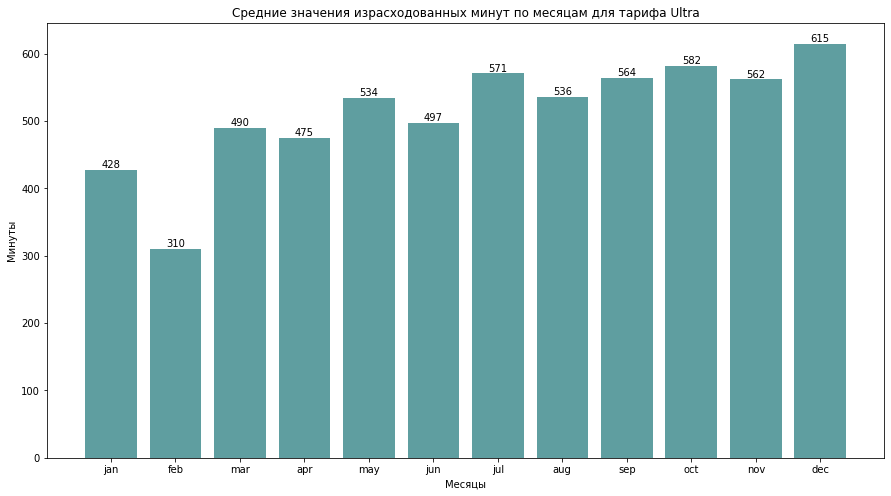

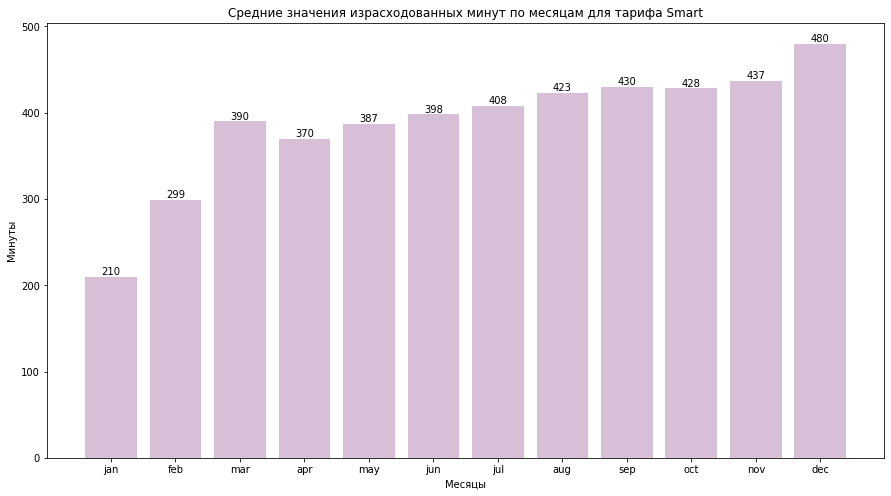

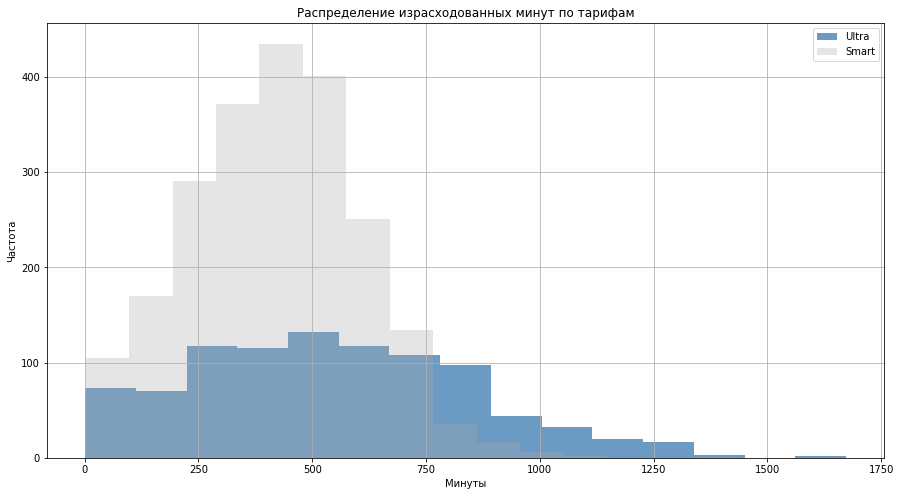

In [47]:
# Вызываем функцию get_split_statistics() для таблицы user_calls
# Сохраняем наборы данных с ненулевыми значениями для разных тарифов в переменных ultra_calls и smart_calls
ultra_calls, smart_calls = get_split_statistics(user_calls, kind='c')

In [48]:
# Создадим ещё одну функцию для подсчёта среднего, дисперсии и стандартного отклонения. 
# Результатом её работы будет именно вывод на экран информации.
def display_statistics(ultra, smart, kind='c'):
    tariff_list = [ultra, smart]
    tariff_names = ['Ultra', 'Smart']
    
    if kind == 'c':
        measure = 'израсходованных минут'
    elif kind == 'm':
        measure = 'израсходованных сообщений'
    elif kind == 't':
        measure = 'израсходованного трафика'
    else:
        measure = ''
    
    for i in range(len(tariff_list)):
        current_table = tariff_list[i]
        # считаем среднее
        mean_value = round(current_table.mean()) # во избежание длинных чисел, будем округлять
        # Мы помним, что работа происходит не с генеральной совокупностью, а с выборкой, поэтому вводим параметр ddof
        # считаем дисперсию
        variance_estimate = round(np.var(current_table, ddof=1))
        # считаем стандартное отклонение
        standard_deviation = round(np.std(current_table, ddof=1))
        
        print(f'Среднее значение {measure} для пользователей тарифа {tariff_names[i]}: {mean_value}')
        print(f'Дисперсия: {variance_estimate}')
        print(f'Стандартное отклонение: {standard_deviation}')
        print('')


In [49]:
display_statistics(ultra_calls, smart_calls, kind='c')

Среднее значение израсходованных минут для пользователей тарифа Ultra: 548
Дисперсия: 93338
Стандартное отклонение: 306

Среднее значение израсходованных минут для пользователей тарифа Smart: 419
Дисперсия: 35718
Стандартное отклонение: 189



По графикам видно, что средние значения израсходованных минут, разбитые по месяцам для пользователей тарифа Ultra выше, чем для пользователей тарифа Smart, что вполне объяснимо: ведь в тариф Ultra включено 3000 минут, а в тариф Smart — 500. При этом мы можем наблюдать, что средние значения тарифа Smart стремятся к числу включенных минут (в декабре среднее значение составило 480 минут), тогда как пользователи тарифа Ultra в среднем очень далеки от израсходования лимита. Можно выделить месяц декабрь, как месяц, в котором среднее количество израсходованных минут в обоих тарифах — максимальное. Вероятно, многие пользователи активнее совершают звонки перед новогодними праздниками, а в январе и феврале — наоборот, снижают активность.

По гистограмме распределения израсходованных минут по тарифам видно, что число, которое наиболее часто характеризует количество израсходованных минут в месяце у пользователей тарифа Smart находится чуть левее значения лимита (500) — согласно расчётам среднего оно равно 419. Распределение здесь нормальное, слегка скошенное влево: всё же среди пользователей тарифа Smart чуть больше тех, кто в среднем укладывается в месячный лимит по минутам. Распределение для пользователей тарифа Ultra очевидно обладает большим разбросом, в чём не сложно убедиться по показателям дисперсии и стандартного отклонения. Это говорит о бОльших различиях в поведенческих особенностях среди пользователей тарифа Ultra. Ultra-распределение также скошено влево и напоминает нормальное.

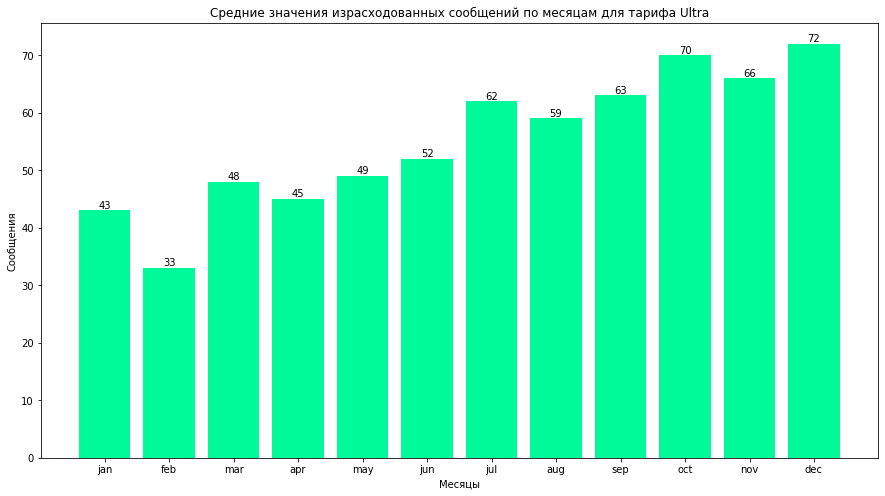

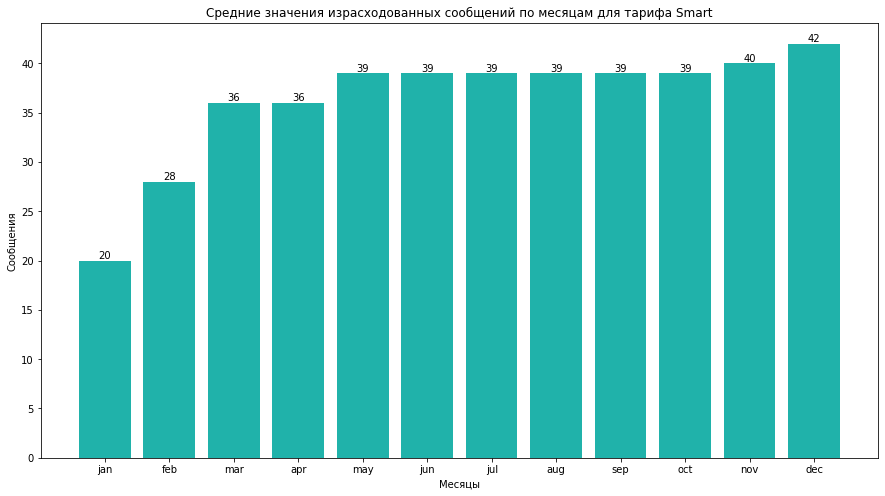

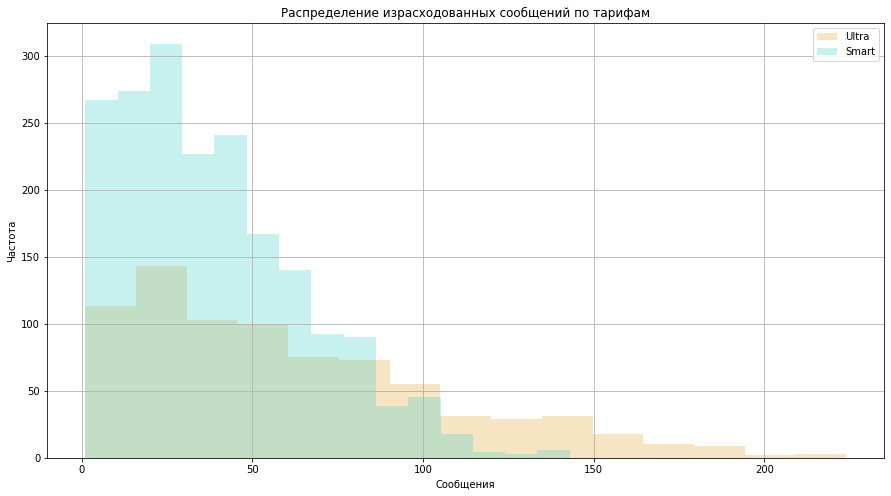

In [50]:
# Теперь вызовем функцию get_split_statistics() для набора данных о сообщениях пользователей
ultra_messages, smart_messages = get_split_statistics(user_messages, kind='m')

In [51]:
display_statistics(ultra_messages, smart_messages, kind='m')

Среднее значение израсходованных сообщений для пользователей тарифа Ultra: 61
Дисперсия: 2110
Стандартное отклонение: 46

Среднее значение израсходованных сообщений для пользователей тарифа Smart: 39
Дисперсия: 718
Стандартное отклонение: 27



По графикам средних значений израсходованных сообщений по месяцам можно заметить, что пользователи тарифа Ultra в среднем отправляют больше сообщений, чем пользователи тарифа Smart. Пики средних значений в обоих графиках снова приходятся на декабрь. Получается, предпраздничная активность выражается не только в количестве минут, израсходованых на разговоры, но и в количестве отправленных сообщений. Средние значения отправленных сообщений в период с мая по октябрь у пользователей тарифа Smart более стабильны, чем у пользователей тарифа Ultra, можно даже утверждать, что оно практически неизменно и приблизительно равно (потому что мы округяли) 39 сообщениям.

Распределения израсходованных сообщений по тарифам напоминают нормальные распределения, они скошены влево. То есть среднее по отошению к медиане находится слева и справа мы наблюдаем длинные хвосты. При этом, хвост у пользователей тарифа Ultra заметно длиннее, что говорит о том, что среди этих пользователей есть такие, которые в среднем отправляют значимо больше сообщений, чем пользователи тарифа Smart, стандартное отклонение на данных по этим пользователям выше.

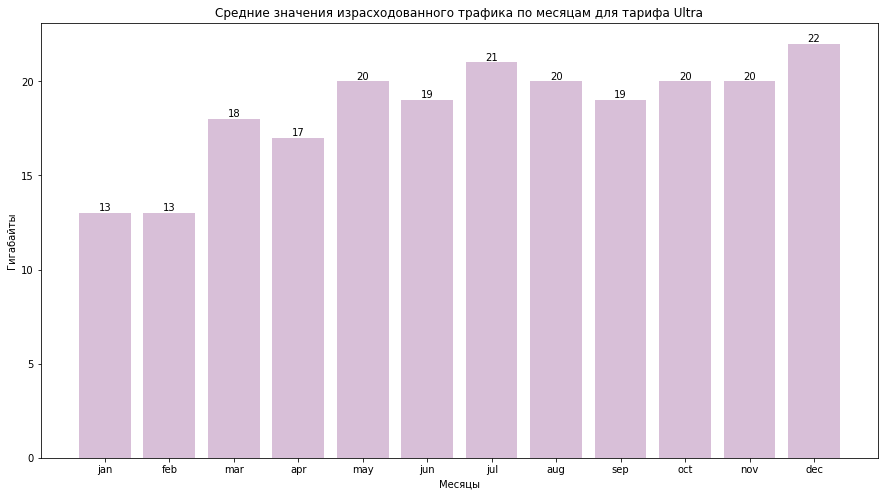

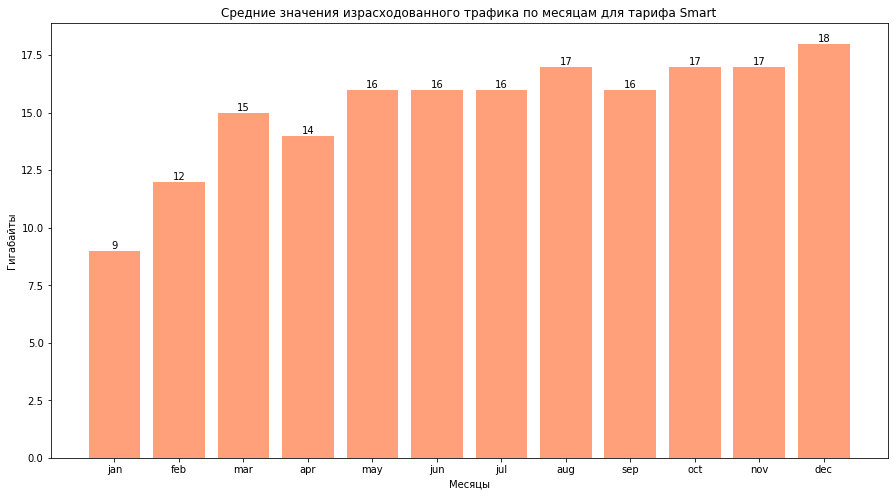

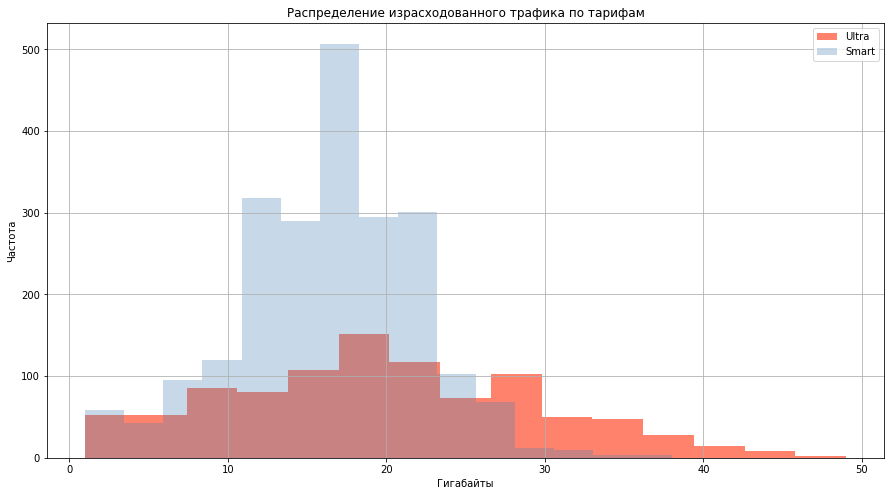

In [52]:
ultra_traffic, smart_traffic = get_split_statistics(user_traffic, kind='t')

In [53]:
display_statistics(ultra_traffic, smart_traffic, kind='t')

Среднее значение израсходованного трафика для пользователей тарифа Ultra: 20
Дисперсия: 94
Стандартное отклонение: 10

Среднее значение израсходованного трафика для пользователей тарифа Smart: 16
Дисперсия: 33
Стандартное отклонение: 6



В тариф Ultra включено 30720 мегабайт трафика, а в тариф Smart — 15360. Это 30 и 15 гигабайт соответственно. На графиках средних значений израсходованного трафика по месяцам видно, что в среднем пользователи тарифа Smart не укладываются в тарифный лимит и выходят за него. В среднем каждый пользователь тарифа Smart переплачивает 200 рублей за дополнительный гигабайт траффика (округлённое среднее по всему набору данных равно 16), то есть можно говорить о том, что в среднем телекоммуникационная компания «Мегалайн» имеет с пользователей тарифа Smart не 550 рублей, а как минимум 750, если иметь в виду только переплату за выход из лимита по трафику. Это сокращает разрыв в реальной стоимости тарифов (и, что само собой разумеется, увеличивает прибыль телекоммуникационной компании). Пользователям тарифа Ultra в среднем хватает тарифного лимита по трафику с уверенным запасом. Также как и в случаях с количеством израсходованных минут и сообщений, с трафиком повторяется история: максимальные средние значения соответствуют последнему месяцу в году, а минимальные — первым двум.


Распределения израсходованного трафика по тарифам выглядят как нормальные: у пользователей тарифа Ultra можем наблюдать скошенность вправо: среди них есть такие пользователи, которые тратят и по 30 и по 40 и даже почти по 50 гигабайт в месяц.

# Шаг 4. Проверяем гипотезы

Проверим гипотезы «средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются» и «средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов». В обоих случаях это будут проверки гипотез на равенство предполагаемых средних двух генеральных совокупностей.


Нулевые гипотезы H0 сформулируем так: 
1. «показатели средней выручки пользователей тарифов «Ультра» и «Cмарт» равны»,

2. «показатель средней выручки пользователей из Москвы равен показателю средней выручки пользователей из других регионов».


Альтернативные гипотезы H1 будут такими: 

1. «показатели средней выручки пользователей этих тарифов не равны»,
2. «показатель средней выручки пользователей из Москвы не равен показателю средней выручки пользователей из других регионов»



В обоих случаях гипотезы двустороние, то есть в них возможны отклонения в большую и меньшую стороны.

Для проверки гипотез на равенство предполагаемых средних двух генеральных совокупностей будем использовать t-тест. Препятствий для его использования нет: генеральные совокупности не зависят друг от друга, выборочные средние распределены нормально (выборочные средние всегда показывают распределение близкое к нормальному и центром такого распределения становится истинное среднее генеральной совокупности). А так как выборки будут иметь разные размеры, то мы укажем неравенство дисперсий с помощью параметра equal_var метода scipy.stats.ttest_ind().

In [54]:
# Начнём с того, что добавим таблице total_tarified столбец с городами проживания клиентов.
total_tarified = total_tarified.merge(users[['user_id', 'city']])
total_tarified

,user_id,tariff_name,1,2,3,4,5,6,7,8,9,10,11,12,city
0,1000,ultra,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950,Краснодар
1,1003,ultra,0,0,0,0,0,0,0,1950,1950,1950,1950,1950,Москва
2,1004,ultra,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950,Новокузнецк
3,1013,ultra,0,0,0,0,0,0,0,0,0,0,1950,1950,Иваново
4,1016,ultra,0,0,0,0,0,0,0,0,0,0,1950,1950,Омск
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,1496,smart,550,5750,4550,2950,4150,2550,4150,3750,5350,5750,4550,2953,Вологда
494,1497,smart,0,0,0,0,0,0,0,0,0,550,550,2550,Челябинск
495,1498,smart,0,0,0,0,0,0,550,4186,3350,2950,550,550,Владикавказ
496,1499,smart,0,0,0,0,0,0,0,0,550,1750,1777,598,Пермь


In [55]:
def check_hypothesis(table, column='tariff_name'):
    
    if column == 'tariff_name': # В столбце с тарифами у нас два значения, поэтому мы можем представить их как 'Ultra' и не 'Ultra'
        split_value = 'ultra'
        message = 'Нулевая гипотеза: показатели средней выручки пользователей тарифов «Ультра» и «Cмарт» равны.'
    if column == 'city':
        # Во второй проверке нам предстоит проверить выборки из Москвы и из не Москвы
        message = 'Нулевая гипотеза: показатель средней выручки пользователей из Москвы равен показателю средней выручки пользователей из других регионов.'
        split_value = 'Москва'
        
    table_1 = table[table[column] == split_value] # таблица со значением, равным split_value в столбце column
    table_2 = table[table[column] != split_value] # таблица со значением, не равным split_value в столбце column
    
    table_list = [table_1, table_2]
    
    main_value_set = [] # Список, в котором окажутся два списка с наборами данных без нулей из двух таблиц
    for i in range(len(table_list)):
        current_value_set = [] # Список, в котором будут собраны все значения кроме нулей из очередной таблицы
        for j in range(1, 13):
            current_table = table_list[i]
            current_table = current_table[current_table[j] > 0] # Таблица в текущем столбце не содержит нулей
            current_month = current_table[j] # Текущий столбец без нулей сохраняем в переменную current_month
            current_value_set += list(current_month)
        main_value_set.append(current_value_set)
        
    first_set, second_set = main_value_set[0], main_value_set[1]
    
    # Очевидно, что выборки в списках first_set и second_set получатся разных размеров, но введём проверку на их равенство.
    # Результат этой проверки будет влиять на значение параметра equal_var метода scipy.stats.ttest_ind()
    
    if len(first_set) == len(second_set):
        ev = True
    else:
        ev = False
        
    alpha = .05 # критический уровень статистической значимости
    results = st.ttest_ind(first_set, second_set, equal_var=ev)
    
    
    print(message)
    print('p-значение:', results.pvalue)
    
    if results.pvalue < alpha:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")
        
    return first_set, second_set

In [56]:
ultra_set, smart_set = check_hypothesis(total_tarified, column='tariff_name')

Нулевая гипотеза: показатели средней выручки пользователей тарифов «Ультра» и «Cмарт» равны.
p-значение: 2.0136878407039138e-28
Отвергаем нулевую гипотезу


In [57]:
moscow_set, region_set = check_hypothesis(total_tarified, column='city')

Нулевая гипотеза: показатель средней выручки пользователей из Москвы равен показателю средней выручки пользователей из других регионов.
p-значение: 0.6922480538189719
Не получилось отвергнуть нулевую гипотезу


Для проверки гипотез был задан уровень статистической значимости равный 0.05. 

В случае с проверкой первой гипотезы «показатели средней выручки пользователей тарифов «Ультра» и «Cмарт» равны», если представить, что нулевая гипотеза на самом деле верна, то вероятность получить различия между предполагаемыми средними значениями двух генеральных совокупностей равна 2.0136878407039138e-28, то есть вероятность крайне мала, поэтому в результате проверки мы нулевую гипотезу отвергаем и принимаем альтернативную гипотезу: «показатели средней выручки пользователей этих тарифов не равны». Выявлены статистически значимые различия


В случае с проверкой второй гипотезы «показатель средней выручки пользователей из Москвы равен показателю средней выручки пользователей из других регионов», если представить, что эта гипотеза верна, то вероятность получить различия между предполагаемыми средними значениями двух генеральных совокупностей очень высока и составляет почти 70%. Такую гипотезу мы отвергать не будем.

# Шаг 5. Общий вывод

В результате проведённого исследования были получены статистически значимые различия между показателями средней выручки от пользователей тарифов «Ультра» и «Cмарт». При этом статистически значимых различий между теми же показателями среди пользователей из разных регионов обнаружено не было. Нам осталось ответить на главный вопрос: какой тариф приносит больше денег телекоммуникационной компании «Мегалайн»? Чтобы ответить на этот вопрос, построим гистограммы распределений по двум наборам данных со значениями выручки и посчитаем статистики: среднее, дисперсию и стандартное отклонение по этим наборам.

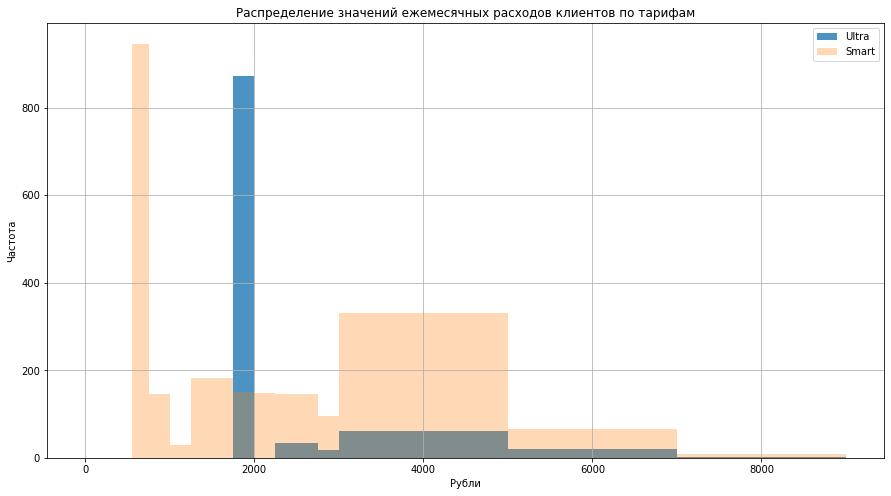

In [58]:
list_with_ultra_and_smart = [pd.Series(ultra_set), pd.Series(smart_set)]
tariff_names = ['Ultra', 'Smart']
plt.title(f'Распределение значений ежемесячных расходов клиентов по тарифам')
plt.xlabel('Рубли')
plt.ylabel('Частота')
for i in range(len(list_with_ultra_and_smart)):
    alpha = 0.8 - i / 10 * 5 # задаём разную прозрачность гистограммам
    list_with_ultra_and_smart[i].hist(figsize=(15, 8), bins=[0, 550, 750, 1000, 1250, 1750, 2000, 2250, 2750, 3000, 5000, 7000, 9000], alpha=alpha, label=tariff_names[i])
    plt.legend() # Выведем легенду

По графику распределения значений ежемесячных расходов клиентов по тарифам видно, что показатели для пользователей тарифа Ultra находятся в более ограниченном диапазоне, чем те же показатели для пользоватеелй тарифа Smart. Наиболее часто клиенты обоих тарифов тратят на услуги связи сумму, которая равна ежемесячной плате за тариф. Следующее по популярности значение находится в диапазоне от 3000 до 5000 рублей. У клиентов тарифа smart таких трат было почти 400 за изучаемый период, тогда как пользователи тарифа ultra оказывались в этом диапазоне не более 100 раз. В диапазонах от 5000 до 7000 и от 7000 до 9000 рублей пользователи тарифа Smart оказывались также ощутимо чаще пользователей тарифа Ultra. 


Можно сделать вывод о том, что пользователи тарифа Smart намного чаще пользователей тарифа Ultra выходят за тарифные лимиты и, соответственно приносят телекоммуникационной компании «Мегалайн» больше денег. Рассчитаем статистики, чтобы подтвердить этот вывод.

In [59]:
for i in range(len(list_with_ultra_and_smart)):
    current_set = list_with_ultra_and_smart[i]
    mean_value = round(current_set.mean()) # во избежание длинных чисел, будем округлять
    variance_estimate = round(np.var(current_set, ddof=1))
    standard_deviation = round(np.std(current_set, ddof=1))
    total_sum = sum(current_set)
    print(f'Среднее значение ежемесячных расходов для пользователей тарифа {tariff_names[i]}: {mean_value}')
    print(f'Дисперсия: {variance_estimate}')
    print(f'Стандартное отклонение: {standard_deviation}')
    print(f'Суммарно пользователи тарифа {tariff_names[i]} принесли компании Мегалайн {total_sum} рублей')
    print('')

Среднее значение ежемесячных расходов для пользователей тарифа Ultra: 2186
Дисперсия: 555918
Стандартное отклонение: 746
Суммарно пользователи тарифа Ultra принесли компании Мегалайн 2196450 рублей

Среднее значение ежемесячных расходов для пользователей тарифа Smart: 1751
Дисперсия: 2172876
Стандартное отклонение: 1474
Суммарно пользователи тарифа Smart принесли компании Мегалайн 3942184 рублей



И, действительно, хоть среднее значение ежемесячных расходов пользователей тарифа Smart равно 1751 рублю против значения в 2186 рублей для пользователей тарифа Ultra, у первой выборки показатель стандартного отклонения вдвое больше (1474 против 746), а это значит, что диапазон в три стандартных отклонения от среднего будет содержать намного большие значения для пользователей тарифа Smart, чем диапазон в три стандартных отклонения для пользователей тарифа Ultra. Именно поэтому мы видим, что пользователи тарифа Smart принесли компании Мегалайн 3.942.184 рублей против 2.196.450 рублей, полученных от пользователей тарифа Ultra.

Вывод: Тариф Smart приносит почти вдвое больше денег компании Мегалайн, чем тариф Ultra. Следует скорректировать рекламный бюджет в пользу тарифа Smart с тем, чтобы компания Мегалайн получила больше прибыли.